# Skin bacteria on various body sites
## data from:
Body Site Is a More Determinant Factor than Human Population Diversity in the Healthy Skin Microbiome", Perez Perez et al. 2016

Fasta files downloaded from SRA accession number: PRJNA314604

And processed using deblur (default parameters) and QIIME assign_taxonomy.py with RDP method (default parameters)

We discard samples with less than 1000 reads, and normalize each remaining sample to 10000 reads

## Init Calour

In [1]:
import calour as ca
ca.set_log_level('INFO')
%matplotlib notebook

/Users/amnon/miniconda3/envs/calour/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Load the 16S amplicon dataset

In [2]:
dat=ca.read_amplicon('skin.bodysite.min25.clean.withtax.biom','map.joined.txt',normalize=10000,min_reads=1000)

2018-07-12 17:31:02 INFO loaded 645 samples, 2938 features
2018-07-12 17:31:03 INFO After filtering, 645 remaining


In [3]:
dat

AmpliconExperiment ("skin.bodysite.min25.clean.withtax.biom") with 645 samples, 2938 features

# look at the complete dataset
cluster bacteria based on similar behavior and discard bacteria with less than 10 reads total on all sample

In [4]:
datc=dat.cluster_features(10)

2018-07-12 17:31:06 INFO After filtering, 2938 remaining


In [5]:
datc

AmpliconExperiment ("skin.bodysite.min25.clean.withtax.biom") with 645 samples, 2938 features

In [6]:
datc.sample_metadata.columns

Index(['BioSample_s', 'Experiment_s', 'Library_Name_s', 'MBases_l', 'MBytes_l',
       'Run_s', 'SRA_Sample_s', 'Sample_ID_s', 'Sample_Name_s', 'age_s',
       'timepoint', 'subj', 'ethnicity_s', 'isolate_s', 'Assay_Type_s',
       'AssemblyName_s', 'BioProject_s', 'BioSampleModel_s', 'Center_Name_s',
       'Consent_s', 'InsertSize_l', 'LibraryLayout_s', 'LibrarySelection_s',
       'LibrarySource_s', 'LoadDate_s', 'Organism_s', 'Platform_s',
       'ReleaseDate_s', 'SRA_Study_s', 'biomaterial_provider_s',
       'g1k_analysis_group_s', 'g1k_pop_code_s', 'sample_type_s', 'sex_s',
       'source_s', 'tissue_s', 'time', 'design_description', 'bodysite',
       'sample_name', '_sample_id', '_calour_original_abundance'],
      dtype='object')

## read from dbBact (dbbact.org) annotations for all bacteria in the experiment
For each bacteria, keep the annotation with the largest number of observations out of 'saliva','skin' or'feces'

By default it is added as 'common_term' column in feature_metadata


In [7]:
datc = datc.add_terms_to_features('dbbact',use_term_list=['saliva','skin','feces'])

2018-07-12 17:31:19 INFO Getting dbBact annotations for 2938 sequences, please wait...
2018-07-12 17:31:33 INFO Got 50183 annotations
2018-07-12 17:31:33 INFO Added annotation data to experiment. Total 2259 annotations, 2938 terms


In [8]:
datc.feature_metadata.common_term = ['other' if i=='NA' else i for i in datc.feature_metadata.common_term]

## Sort the samples according to body site
and timepoint within each body site

In [9]:
datc = datc.sort_samples('time').sort_samples('bodysite')

## And plot it 
with the feature color bar showing the common dbBact annotation per bacteria

<IPython.core.display.Javascript object>


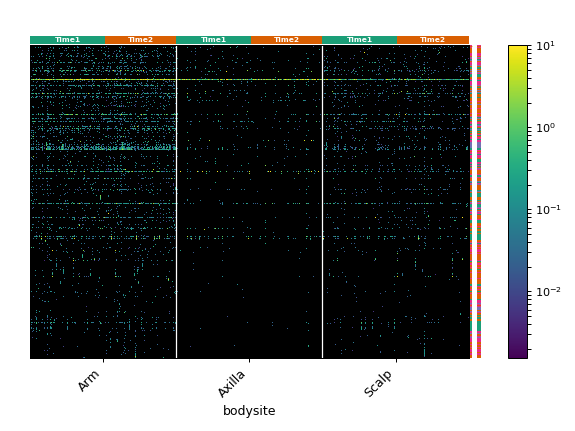

In [10]:
datc.normalize(100).plot(sample_field='bodysite', feature_field=None,
                         barx_fields=['time'], bary_fields=['common_term'],
                         clim=[0, 10])

# We look only at the Arm samples

In [11]:
skin=datc.filter_samples('bodysite','Arm')

In [12]:
skin=skin.cluster_features(10)

2018-07-12 17:32:12 INFO After filtering, 2674 remaining


## Plot all the arm bacteria (Fig. 3A)
We also use this interactive heatmap to look for interesting clusters and mark their coordinates

(using "print axes ranges" button), for creating the zoom in figure panels

<IPython.core.display.Javascript object>


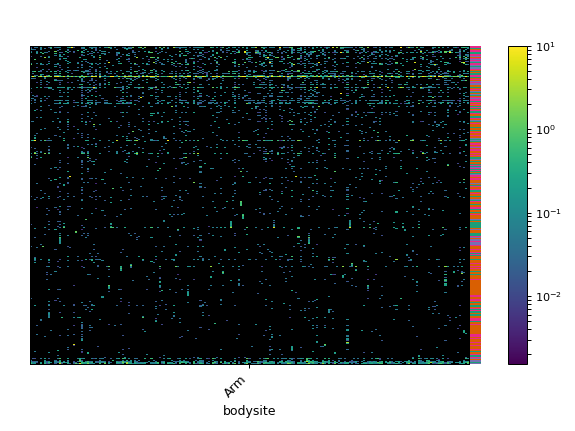

In [13]:
# colors: blue - saliva; green - feces; orange - other; pink - skin
f1=skin.normalize(100).sort_samples('bodysite').plot(sample_field='bodysite',gui='jupyter',
                                                     clim=[0,10], feature_field=None,
                                                     bary_fields=['common_term'], bary_label=False)

In [14]:
f1.save_figure('figure-3A-skin-all.pdf')

## Plot the saliva bacteria cluster zoom in (Fig. 3D)
Note the Blue color on the feature colorbar for most bacteria

<IPython.core.display.Javascript object>


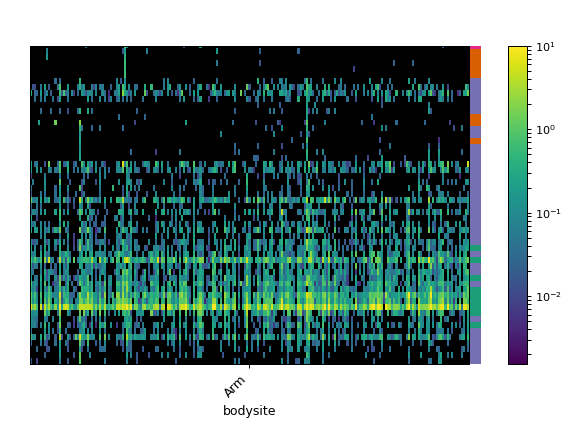

In [15]:
f2=skin.normalize(100).sort_samples('bodysite').plot(sample_field='bodysite',gui='jupyter',
                                                     bary_fields=['common_term'],bary_label=False,
                                                     clim=[0,10], feature_field=None,
                                                     rect=[-0.5, 214.5, 2673.5, 2620])

In [16]:
f2.save_figure('figure-3D-skin-zoom-saliva.pdf')

## Plot the skin bacteria cluster zoom in (Fig. 3B)
Note the Pink color on the feature colorbar for most bacteria

<IPython.core.display.Javascript object>


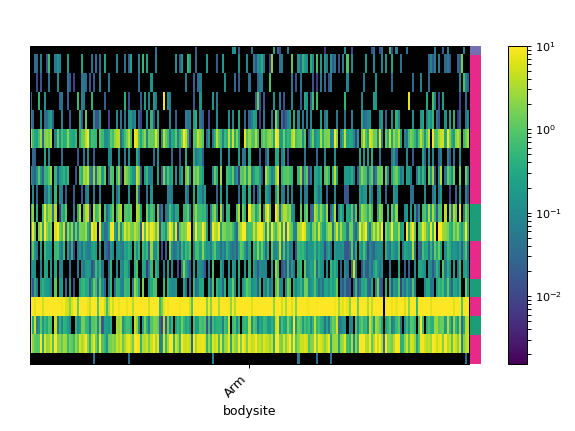

In [17]:
f3=skin.normalize(100).sort_samples('bodysite').plot(sample_field='bodysite',gui='jupyter',
                                                     bary_fields=['common_term'],bary_label=False,
                                                     clim=[0,10], feature_field=None,
                                                     rect=[-0.5, 214.5, 271.078125, 254])

In [24]:
f3.save_figure('figure-3B-skin-zoom-skin.pdf')

## Plot a fecal bacteria cluster zoom in
Note the Green color on the feature colorbar for most bacteria

<IPython.core.display.Javascript object>


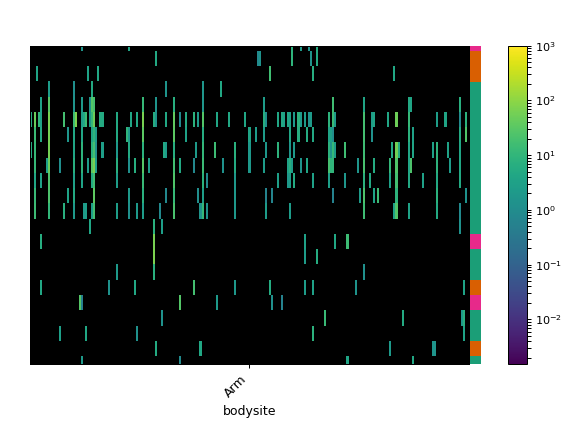

In [18]:
f4=skin.sort_samples('bodysite').plot(sample_field='bodysite',gui='jupyter',
                                      bary_fields=['common_term'],bary_label=False,
                                      clim=[0,1000], feature_field=None,
                                      rect=[-0.5, 214.5, 2193.015625, 2172.125])

# Create the fasta files for the skin and saliva bacterial clusters
In the GUI, we select the bacteria in the cluster and save to fasta

## Saliva cluster bacteria (saved to saliva-seqs-new.fa)

In [19]:
f2=skin.sort_samples('bodysite').plot(sample_field='bodysite',gui='qt5',
                                      bary_fields=['common_term'],bary_label=False,
                                      clim=[0,1000], feature_field=None,
                                      rect=[-0.5, 214.5, 2673.5, 2589.9375])

## Skin cluster bacteria (saved as seqs-skin-skin.fa)

In [20]:
f3=skin.normalize(100).sort_samples('bodysite').plot(sample_field='bodysite',gui='qt5',
                                                     bary_fields=['common_term'],bary_label=False,
                                                     clim=[0,10], feature_field=None,
                                                     rect=[-0.5, 214.5, 271.078125, 250.1875])

# Filter features keeping only the skin or saliva cluster bacteria

In [21]:
st=skin.filter_fasta('./saliva-seqs-new.fa')

In [22]:
skinbact=skin.filter_fasta('./seqs-skin-skin.fa')

# plot the taxonomies bar plot

In [23]:
import matplotlib.pyplot as plt
import numpy as np

## for the saliva cluster bacteria (Fig. 3E)

<IPython.core.display.Javascript object>


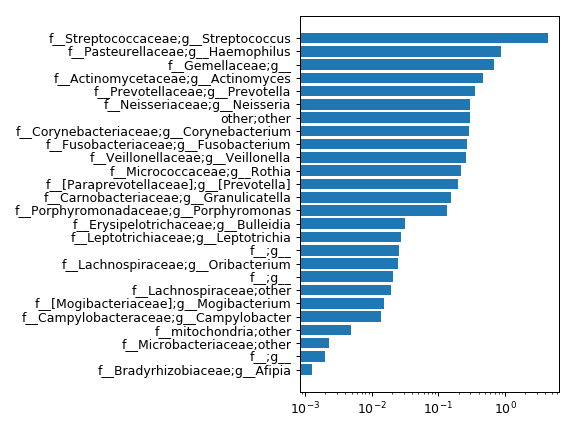

In [24]:
f = plt.figure()
zzz=st.collapse_taxonomy()
zzz=zzz.sort_abundance(key=np.mean)
freq=[]
tax=[]
allmean = zzz.data.mean(axis=0)
for idx,cbact in enumerate(zzz.feature_metadata.index.values):
    ctax = zzz.feature_metadata.taxonomy[cbact].split(';')
    ctax = ';'.join(ctax[-2:])
    tax.append(ctax)
    freq.append(allmean[idx]/100)
plt.barh(np.arange(len(freq)),freq,align='center')
plt.xscale('log')
plt.yticks(np.arange(len(freq)),tax)
plt.tight_layout()

In [25]:
f.savefig('figure-3E-skin-zoom-taxonomy.pdf')

## for the skin cluster bacteria (Fig. 3C)

<IPython.core.display.Javascript object>


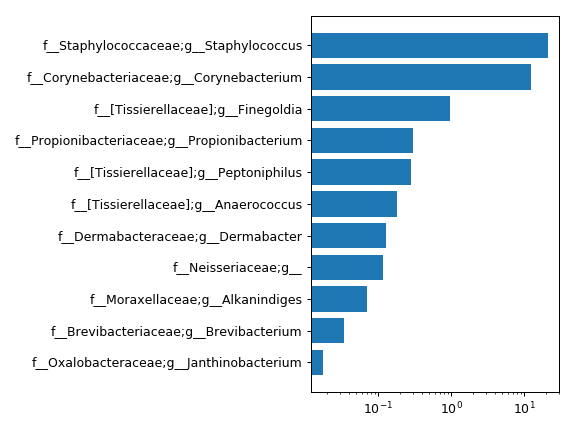

In [26]:
f = plt.figure()
zzz=skinbact.collapse_taxonomy()
zzz=zzz.sort_abundance(key=np.mean)
freq=[]
tax=[]
allmean = zzz.data.mean(axis=0)
for idx,cbact in enumerate(zzz.feature_metadata.index.values):
    ctax = zzz.feature_metadata.taxonomy[cbact].split(';')
    ctax = ';'.join(ctax[-2:])
    tax.append(ctax)
    freq.append(allmean[idx]/100)
plt.barh(np.arange(len(freq)),freq,align='center')
plt.xscale('log')
plt.yticks(np.arange(len(freq)),tax)
plt.tight_layout()

In [27]:
f.savefig('figure-3C-skin-skincluster-taxonomy.pdf')

# dbBact term enrichment analysis for the saliva cluster (Fig. 3F)
comparing annotations for the saliva cluster bacteria to annotations for all other bacteria in the arm samples

In [51]:
terms, data, features =skin.enrichment(st.feature_metadata.index.values,
                                       dbname='dbbact',
                                       min_exps=2)

2018-07-12 17:40:55 INFO removed 2168 terms


<IPython.core.display.Javascript object>


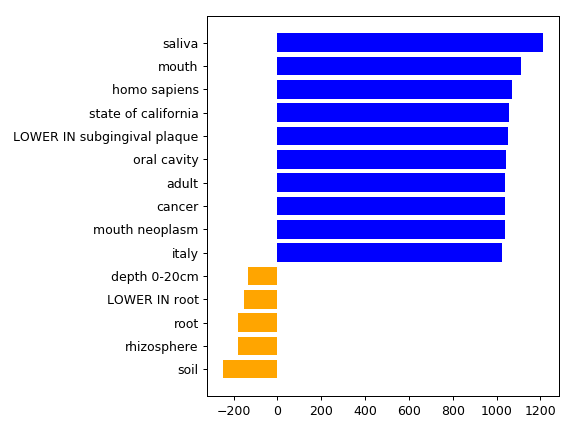

In [52]:
f=st.plot_enrichment(terms, colors=['blue', 'orange'], labels=None)

In [53]:
f.figure.tight_layout()

In [54]:
f.figure.savefig('figure-3F-skin-salivacluster-terms.pdf')